# Aula 1 - Introdução e análises iniciais


In [0]:
import pandas as pd

In [0]:
movie_dataset = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
movie_dataset.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
ratings_dataset = pd.read_csv('https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true')
ratings_dataset.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
ratings_dataset.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [0]:
  ratings_dataset['rating']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64

In [0]:
ratings_dataset['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [0]:
ratings_by_movie = ratings_dataset.groupby('movieId')['rating'].mean()
ratings_by_movie.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [0]:
movies_rated = movie_dataset.join(ratings_by_movie, on='movieId')
movies_rated

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [0]:
movies_rated.sort_values('rating', ascending=False)

,movieId,title,genres,rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


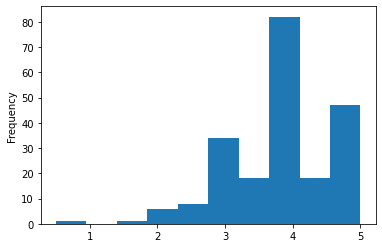

In [0]:
ratings_dataset.query('movieId == 1')['rating'].plot(kind='hist')

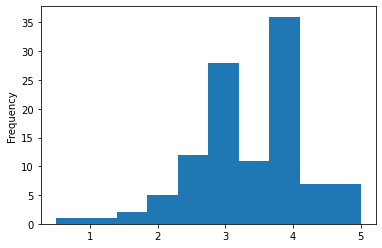

In [0]:
ratings_dataset.query('movieId == 2')['rating'].plot(kind='hist')

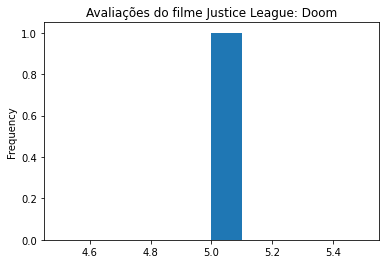

In [0]:
import matplotlib.pyplot as plt

ratings_dataset.query('movieId == 102084')['rating'].plot(kind='hist')
plt.title('Avaliações do filme Justice League: Doom')
plt.show()

In [0]:
movies_rated.query('movieId == 102084')

,movieId,title,genres,rating
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0


# Desafio 1 do Paulo Silveira
O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [0]:
movies_rated[movies_rated['rating'].isnull()]

,movieId,title,genres,rating
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# Desafio 2 do Guilherme Silveira

Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [0]:
movies_rated = movies_rated.rename(columns={"rating" : "average_rating"})
movies_rated.head()

,movieId,title,genres,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 3 do Guilherme Silveira

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [0]:
ratings_count = pd.Series(ratings_dataset.groupby('movieId')['rating'].count())
movies = movies_rated.join(ratings_count, on='movieId')
movies.columns = ['movieId', 'title', 'genres', 'average_rating', 'rating_count']
movies.head()

,movieId,title,genres,average_rating,rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


# Desafio 4 do Thiago Gonçalves

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [0]:
movies['average_rating'] = movies['average_rating'].round(2)
movies.head()

,movieId,title,genres,average_rating,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


# Desafio 5 do Allan Spadini

Descobrir os generos dos filmes (quais são eles, únicos). 

In [0]:
genres_string = movies['genres'].str.cat(sep='|')
genres_list = genres_string.split(sep='|')
genres_series = pd.Series( (str for str in genres_list) )
genres = genres_series.unique()
genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

# Desafio 6 da Thais André

Contar o número de aparições de cada genero.

In [0]:
genres_series = pd.Series( (str for str in genres_list) )
genres_appearences = pd.DataFrame({ 'genre': genres_series.unique(), 'appearences': genres_series.value_counts().values })
genres_appearences

,genre,appearences
0,Adventure,4361
1,Animation,3756
2,Children,1894
3,Comedy,1828
4,Fantasy,1596
5,Romance,1263
6,Drama,1199
7,Action,980
8,Crime,978
9,Thriller,779


# Desafio 7 do Guilherme Silveira

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

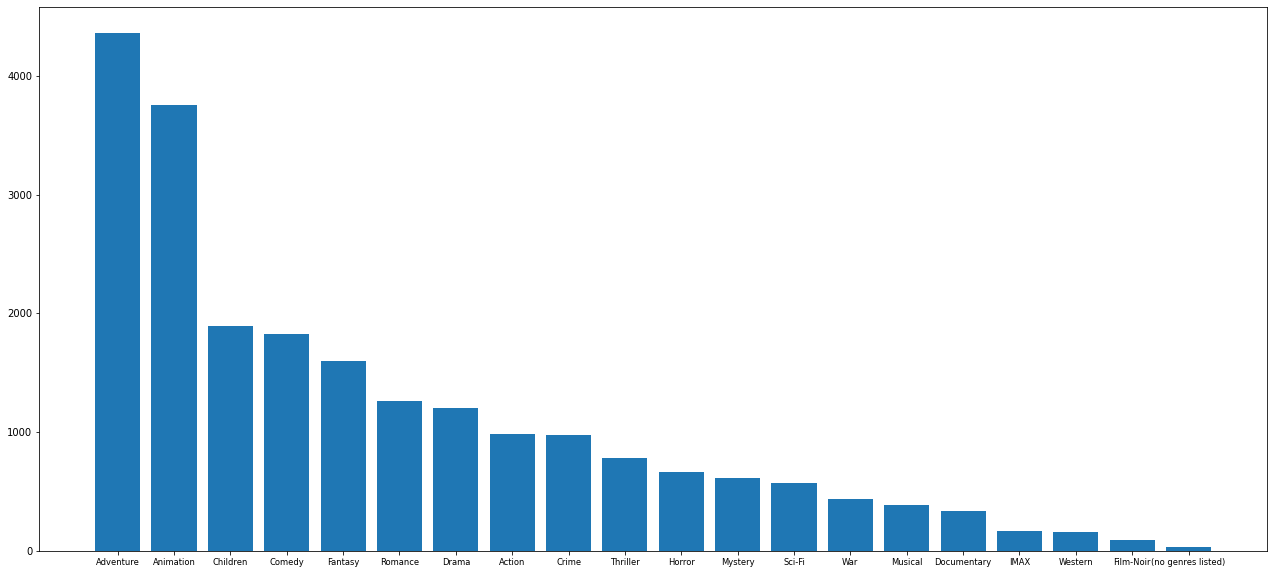

In [0]:
genres_series = pd.Series( (str for str in genres_list) )
genres_df = pd.DataFrame({ 'genre': genres_series })

plt.figure(figsize=(22,10))
plt.bar(range(len(genres_df['genre'].unique())), genres_df['genre'].value_counts(), align='center')
plt.xticks(range(len(genres_df['genre'].unique())), genres_df['genre'].unique(), size='small')
plt.show()

# AULA 02 - Análise de Média e Mediana // Visualização de Dados


Outra resolução para pegar quantidade de filmes de um gênero


In [0]:
movies['genres'].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

Outra resolução para o histograma

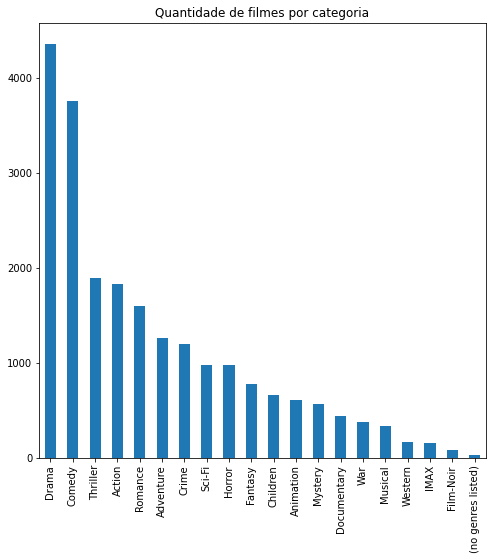

In [0]:
movies['genres'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    figsize=(8,8), 
    title='Quantidade de filmes por categoria'
)

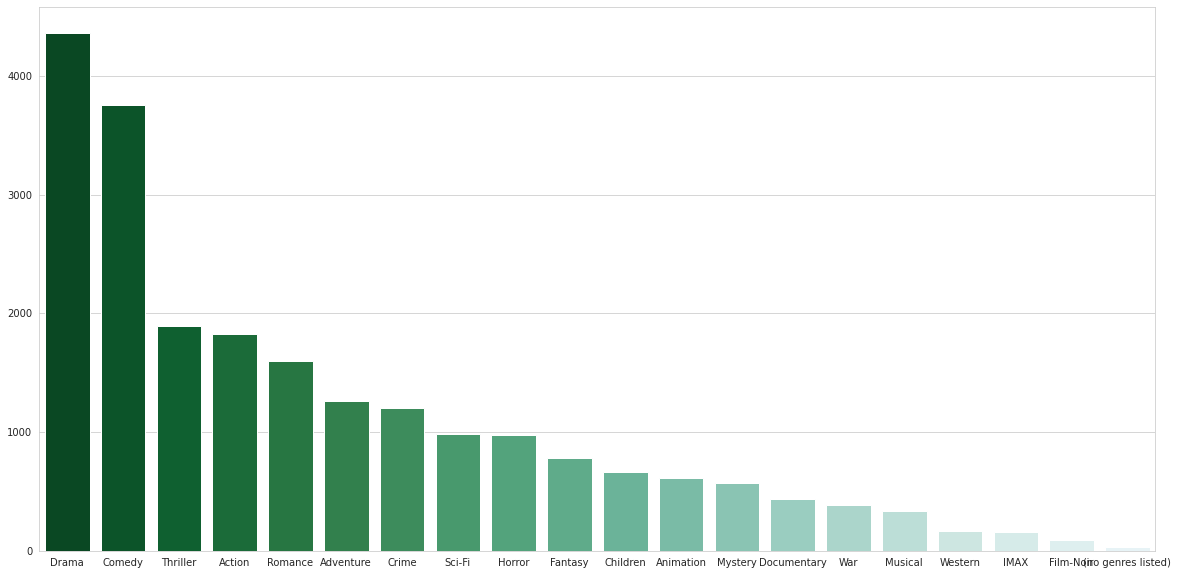

In [0]:
#Visualização pelo seaborn
import seaborn as sns

movies_by_genre = movies['genres'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.barplot(x = movies_by_genre.index, y = movies_by_genre.values, palette=sns.color_palette("BuGn_r", n_colors=len(movies_by_genre.index) + 2))

plt.show()

Verificando distribuição de notas de um filme

In [0]:
def plot_movie(id):
  ratings = ratings_dataset.query(f"movieId == {id}")['rating']
  ratings.plot(kind='hist')
  return ratings.describe()
  

count    21.000000
mean      2.880952
std       0.998809
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: rating, dtype: float64

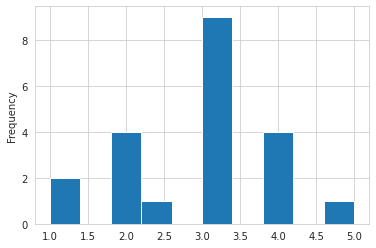

In [0]:
plot_movie(707)

Utilização do boxplot para verificar distribuição das notas e interferência de outliers

In [0]:
def plot_movie_boxplot(id):
  ratings = ratings_dataset.query(f"movieId == {id}")['rating']
  ratings.plot(kind='hist')
  plt.show()
  ratings.plot.box()
  plt.show()
  return ratings.describe()
    

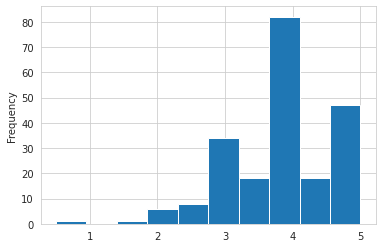

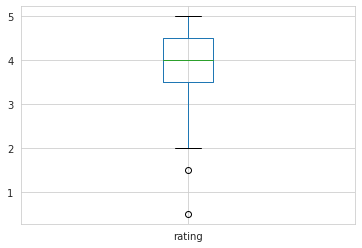

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [0]:
plot_movie_boxplot(1)

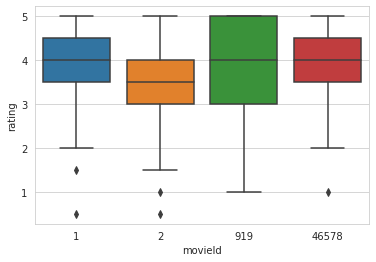

In [0]:
# diferenças entre boxplot do seaborn e do pandas

sns.boxplot(data = ratings_dataset.query("movieId in [1, 2, 919, 46578]"), x='movieId', y='rating')

# Desafio 1  do Guilherme Silveira
Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

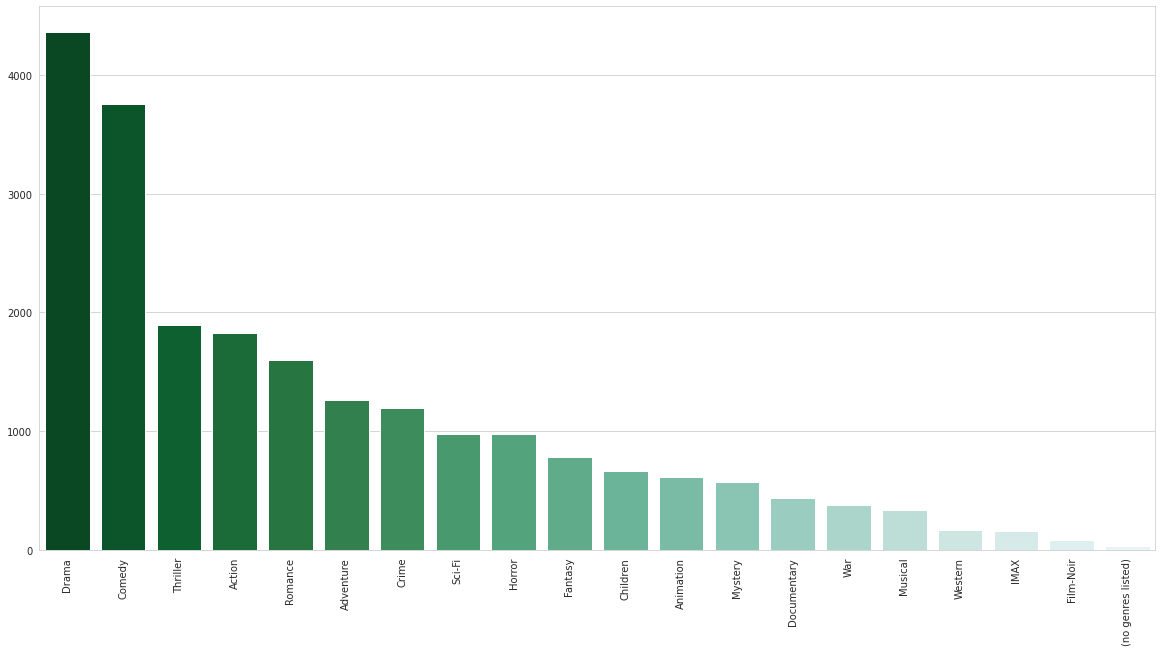

In [0]:
#Visualização pelo seaborn
import seaborn as sns

movies_by_genre = movies['genres'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.barplot(x = movies_by_genre.index, y = movies_by_genre.values, palette=sns.color_palette("BuGn_r", n_colors=len(movies_by_genre.index) + 2))

plt.xticks(rotation=90)
plt.show()

# Desafio 2 do Paulo Silveira
Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

Serão utilizados os 5 primeiros filmes com médias mais próximas a 3. 

In [0]:
selected_movies = movies_rated.query("average_rating > 3").sort_values(by=['average_rating']).head()
selected_movies

,movieId,title,genres,average_rating
1333,1805,Wild Things (1998),Crime|Drama|Mystery|Thriller,3.016129
784,1027,Robin Hood: Prince of Thieves (1991),Adventure|Drama,3.017857
1987,2641,Superman II (1980),Action|Sci-Fi,3.020408
1325,1792,U.S. Marshals (1998),Action|Crime|Thriller,3.021739
1780,2378,Police Academy (1984),Comedy|Crime,3.022727


1333    Movie: Wild Things (1998)
Name: title, dtype: object


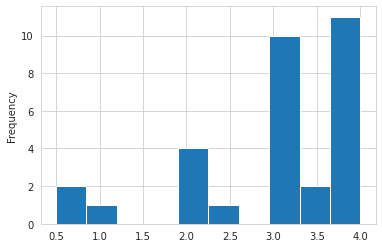

784    Movie: Robin Hood: Prince of Thieves (1991)
Name: title, dtype: object


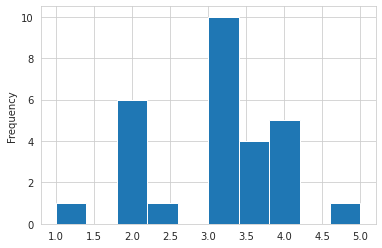

1987    Movie: Superman II (1980)
Name: title, dtype: object


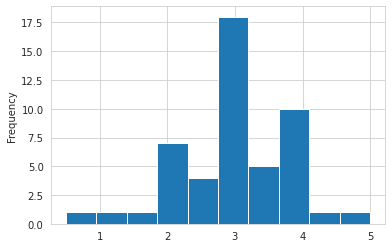

1325    Movie: U.S. Marshals (1998)
Name: title, dtype: object


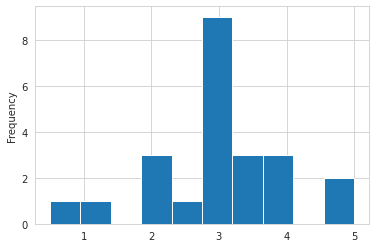

1780    Movie: Police Academy (1984)
Name: title, dtype: object


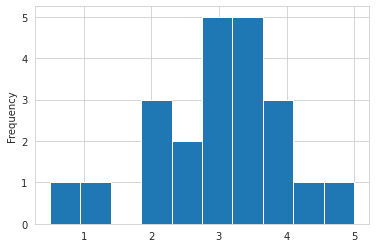

In [0]:
for movie in selected_movies.movieId:
  print('Movie: '+ movies_rated.query(f"movieId == {movie}")['title'])
  plot_movie(movie)
  plt.show()

# Desafio 3 do Paulo Silveira
Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
movies.dropna().sort_values(by=['rating_count'], ascending=False).head(10)


,movieId,title,genres,average_rating,rating_count
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0
97,110,Braveheart (1995),Action|Drama|War,4.031646,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224.0
461,527,Schindler's List (1993),Drama|War,4.225000,220.0


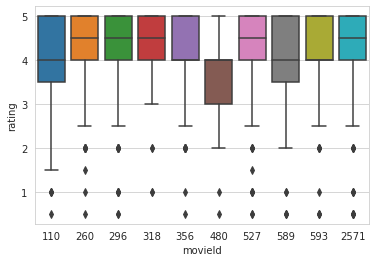

In [0]:
movies_list = movies.dropna().sort_values(by=['rating_count'], ascending=False)['movieId'].head(10)
sns.boxplot(data = ratings_dataset.query(f"movieId in {movies_list.values.tolist()}"), x='movieId', y='rating')

O que podemos observar desses boxplots:
* As médias estão mais próximas da demarcação do primeiro quartil, em geral, do que das medianas em filmes com separação de quartil quase igualitária, por conta dos outliers. 
* Mesmo com outliers abaixo do limitante inferior, os filmes com terceiro quartil mais amplo, possuem médias próximas à mediana, exceto quando primeiro quartil tem amplitude baixa.

# Desafio 4 do Guilherme Silveira
Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

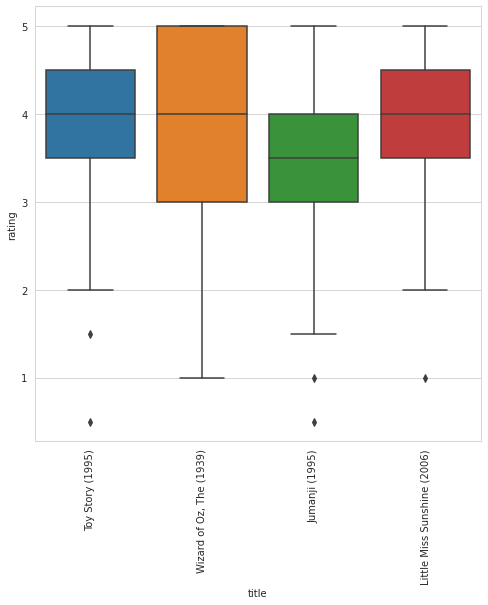

In [0]:
movieIds = movie_dataset.loc[:, ['movieId', 'title']]
rated_movie_titles = ratings_dataset.merge(movieIds, on='movieId', how='right')

plt.figure(figsize=(8,8))
plt.xticks(rotation=90) 
sns.boxplot(
    data = rated_movie_titles.query("movieId in [1, 2, 919, 46578]"),
    x='title',
    y='rating'
)
plt.show()

# Desafio 5 do Allan Spadini
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
worst_selected_movie = movies_rated.sort_values(by=['average_rating']).head(1)
avg_selected_movie = movies_rated.query("average_rating >= 3").sort_values(by=['average_rating']).head(1)
best_selected_movie = movies_rated.sort_values(by=['average_rating'], ascending=False).head(1)

In [0]:
ratings_dataset.query(f"movieId == {best_selected_movie.movieId.values[0]}")

,userId,movieId,rating,timestamp
77875,483,88448,5.0,1315437602


In [0]:
print(ratings_dataset.query(f"movieId == {avg_selected_movie.movieId.values[0]}")['rating'].describe())
print('mode: ', ratings_dataset.query(f"movieId == {avg_selected_movie.movieId.values[0]}")['rating'].mode())

count    3.00
mean     3.00
std      0.50
min      2.50
25%      2.75
50%      3.00
75%      3.25
max      3.50
Name: rating, dtype: float64
mode:  0    2.5
1    3.0
2    3.5
dtype: float64


In [0]:
print(ratings_dataset.query(f"movieId == {worst_selected_movie.movieId.values[0]}")['rating'].describe())
print('mode: ', ratings_dataset.query(f"movieId == {worst_selected_movie.movieId.values[0]}")['rating'].mode())

count    1.0
mean     0.5
std      NaN
min      0.5
25%      0.5
50%      0.5
75%      0.5
max      0.5
Name: rating, dtype: float64
mode:  0    0.5
dtype: float64


Foi possível observar que os filmes com notas extremas, possuem elas por causa da escassez de avaliações

# Desafio 6 da Thais André
Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

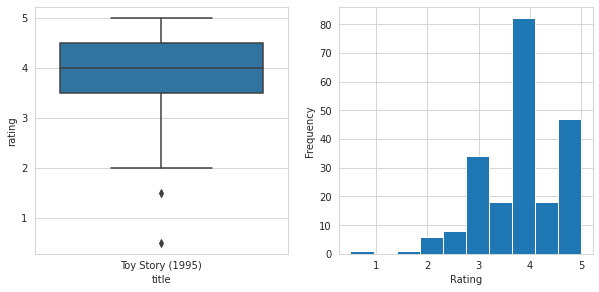

In [0]:


plt.subplots(figsize=(10,10), nrows=1, ncols=2)
plt.xticks(rotation=90)
plt.subplot(2,2,1) 
sns.boxplot(
    data = rated_movie_titles.query("movieId == 1"),
    x='title',
    y='rating'
)

plt.subplot(2,2,2)
plt.xlabel('Rating')
ratings = ratings_dataset.query(f"movieId == 1")['rating']
ratings.plot(kind='hist')

plt.show()

# Desafio 7 do Thiago Gonçalves
Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

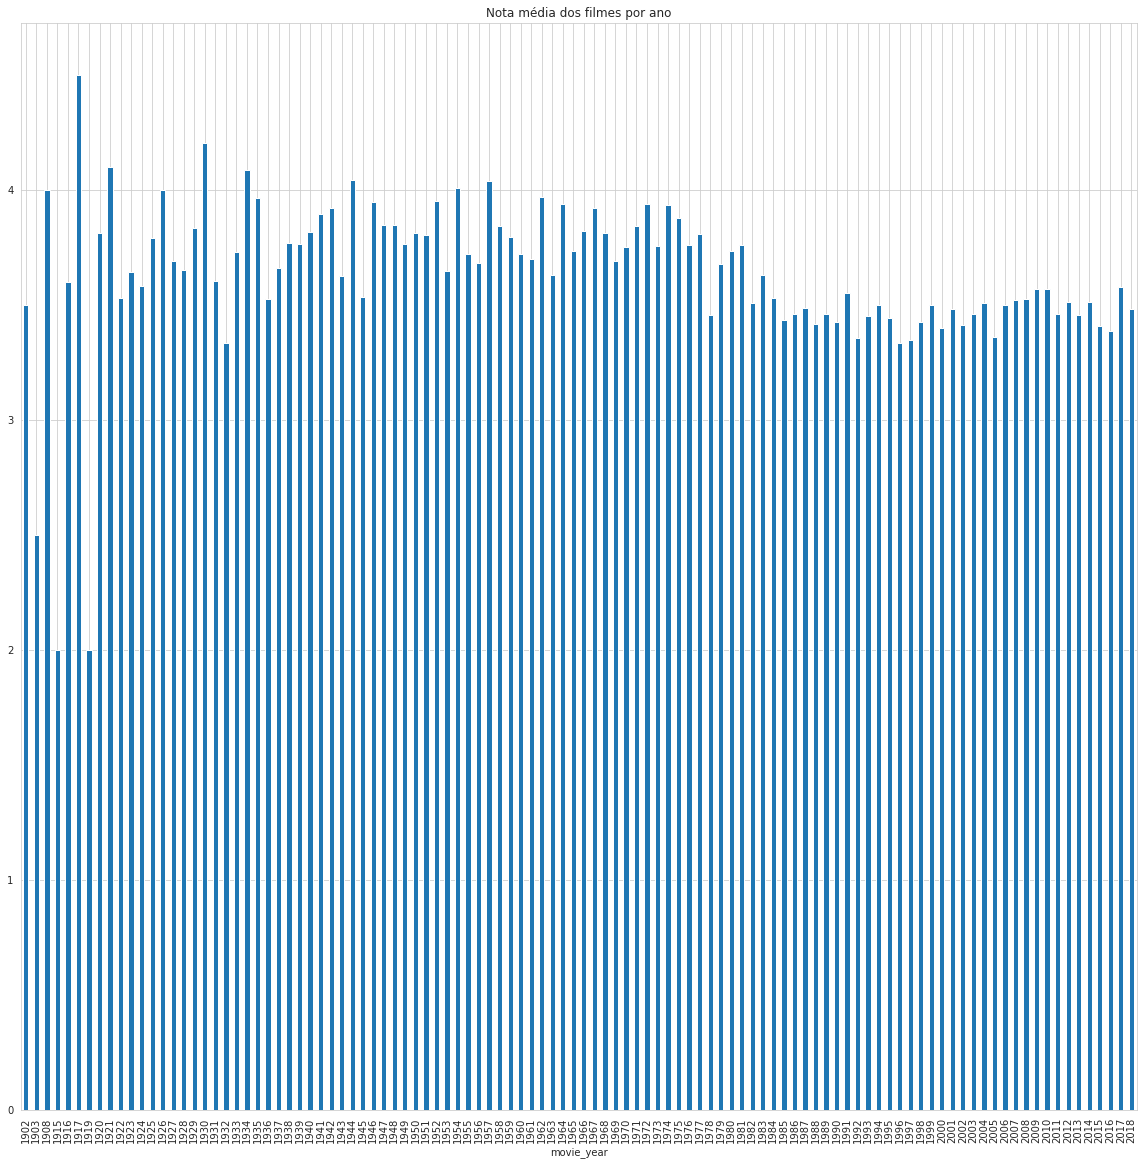

In [0]:
rated_movie_titles = rated_movie_titles.dropna()
dates = []
for value in rated_movie_titles['title']:
  year = value.rsplit('(')[len(value.rsplit('('))-1][0:4]    
  dates.append(year)
rated_movie_titles['movie_year'] = dates

movies_only = rated_movie_titles[rated_movie_titles[['movie_year']].apply(lambda x: x[0].isdigit(), axis=1)]
movies_only.groupby('movie_year')['rating'].mean().plot(
    kind='bar', 
    figsize=(20,20), 
    title='Nota média dos filmes por ano'
)
plt.show()

Esse gráfico é interessante pois pode exibir, pelo menos através dessa amostra de avaliações, o quão boa foi a produção de cinema de determinado ano, através da nota média dos filmes de cada ano. No entanto, essa plotagem não considera quantidade de avaliações, apenas a média das avaliações feitas.

# AULA 03 - Correlações e Explorações de Dados